WHAT I HAVE DONE:
1- table 3. 
2- nulls were dealth with. 
3 a linear regression model was done and a second one too 

In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [191]:
df= pd.read_csv('Table2_3_model_floats.csv')

In [192]:
df.columns

Index(['Unnamed: 0', 'Period', 'Fund name', 'ABN',
       'RSE Regulatory classification', 'Fund type', 'RSE Membership base',
       'Fund's RSE licensee', 'RSE licensee ownership type',
       'RSE licensee profit status', 'RSE licensee board structure',
       'Total assets', 'Number of investment options',
       'One-year\nrate of return_x', 'Five-year\nrate of return',
       'Ten-year\nrate of return', 'Total number of member accounts',
       'Total members' benefits', 'Average member account balance',
       'Growth in number of member accounts',
       'Net assets at beginning of period', 'Employer contributions ',
       'Personal contributions', 'Government co-contributions',
       'Low income super contributions', 'Other member contributions',
       'Member contributions', 'Defined benefit contributions',
       'Contribution tax and surcharge', 'Total Members' benefit flows in',
       'Inward rollovers', 'Outward rollover', 'Net rollovers',
       'Lump sum benefit pay

In [101]:
#Features with the highest correlations
numerical_columns = [
    "Operating expense ratio_y",
    "Total members' benefits",
    "Total Investment expenses",
    "Total assets",
    "Net assets at beginning of period",
    "Net assets at the end of period",
    "Dividend revenue",
    "Total liabilities at the end of period",
    "Contribution tax and surcharge",
    "Total Members' benefit flows in"
]
categorical_columns = [
    "Fund type",
    "RSE licensee profit status",
    "RSE licensee board structure",
    "RSE Membership base",
    "RSE licensee ownership type",
    "Period"
]



In [102]:
main_columns_list = ['Period', 'Fund name', 'ABN', 'Fund type',
    'RSE licensee profit status', 
    'RSE licensee board structure',
    'RSE Membership base', 
    'RSE licensee ownership type', 'Number of investment options', 
    'Total number of member accounts', 'Total benefit payments ', 
    'Net earnings ', 'Total investment income',
    'Total gains/losses', 
    'Employer contributions ', 
    'Member contributions',
    'Total Members\' benefit flows in', 
    'Net insurance flows', 
    'Investment expenses associated with investment management base fee',
    'Total administration and operating expenses', 
    'Operating expense ratio_y',
    'Net earnings after tax',
    'One-year\nrate of return_x', 'Five-year\nrate of return',
    'Ten-year\nrate of return']


In [193]:
filtered_df = df[main_columns_list]

In [194]:
filtered_df.isnull().sum()

Period                                                                  0
Fund name                                                               0
ABN                                                                     0
Fund type                                                               0
RSE licensee profit status                                              0
RSE licensee board structure                                            0
RSE Membership base                                                     0
RSE licensee ownership type                                             0
Number of investment options                                          206
Total number of member accounts                                       447
Total benefit payments                                                241
Net earnings                                                          241
Total investment income                                               241
Total gains/losses                    

In [195]:
filtered_df.dropna(inplace=True)



/var/folders/p0/hyllg8rj5_5d3h8g4g3dfnjm0000gn/T/ipykernel_36686/2747619351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace=True)


In [196]:
filtered_df.isnull().sum()

Period                                                                0
Fund name                                                             0
ABN                                                                   0
Fund type                                                             0
RSE licensee profit status                                            0
RSE licensee board structure                                          0
RSE Membership base                                                   0
RSE licensee ownership type                                           0
Number of investment options                                          0
Total number of member accounts                                       0
Total benefit payments                                                0
Net earnings                                                          0
Total investment income                                               0
Total gains/losses                                              

In [197]:
filtered_df.shape

(1045, 25)

In [198]:
df =filtered_df

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [200]:
df.corr()

/var/folders/p0/hyllg8rj5_5d3h8g4g3dfnjm0000gn/T/ipykernel_36686/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ABN,Number of investment options,Total number of member accounts,Total benefit payments,Net earnings,Total investment income,Total gains/losses,Employer contributions,Member contributions,Total Members' benefit flows in,Net insurance flows,Investment expenses associated with investment management base fee,Total administration and operating expenses,Operating expense ratio_y,Net earnings after tax,One-year\nrate of return_x,Five-year\nrate of return,Ten-year\nrate of return
ABN,1.000000,0.065365,0.147385,0.031594,0.071816,0.065254,0.054220,0.102938,0.078639,0.077301,-0.060447,0.109299,0.110753,-0.080507,0.076012,0.011996,0.035524,0.054770
Number of investment options,0.065365,1.000000,0.059823,0.260689,0.025140,0.240763,-0.059323,0.046148,0.321629,0.105486,-0.174387,-0.062778,0.460572,0.005320,0.035643,-0.070347,-0.142027,-0.124594
Total number of member accounts,0.147385,0.059823,1.000000,0.656221,0.417703,0.638093,0.204079,0.888963,0.700722,0.833530,-0.814831,0.609341,0.694814,-0.097463,0.445078,0.032648,0.130278,0.148462
Total benefit payments,0.031594,0.260689,0.656221,1.000000,0.405897,0.761392,0.140698,0.730631,0.837617,0.885346,-0.582697,0.502437,0.717875,-0.197091,0.434059,0.013930,0.091791,0.218306
Net earnings,0.071816,0.025140,0.417703,0.405897,1.000000,0.334450,0.930107,0.459227,0.374150,0.442728,-0.346052,0.386947,0.354814,-0.097175,0.998862,0.395833,0.270827,0.163185
Total investment income,0.065254,0.240763,0.638093,0.761392,0.334450,1.000000,-0.034091,0.777528,0.854786,0.811118,-0.615051,0.677187,0.748740,-0.142057,0.365004,-0.007063,0.094571,0.205842
Total gains/losses,0.054220,-0.059323,0.204079,0.140698,0.930107,-0.034091,1.000000,0.192954,0.071824,0.161414,-0.136101,0.152497,0.097217,-0.047764,0.917346,0.419702,0.249917,0.093988
Employer contributions,0.102938,0.046148,0.888963,0.730631,0.459227,0.777528,0.192954,1.000000,0.826114,0.941270,-0.757082,0.705301,0.736143,-0.162945,0.488844,0.035522,0.171238,0.251927
Member contributions,0.078639,0.321629,0.700722,0.837617,0.374150,0.854786,0.071824,0.826114,1.000000,0.874783,-0.641448,0.521102,0.795181,-0.135658,0.407233,-0.014163,0.073267,0.149029
Total Members' benefit flows in,0.077301,0.105486,0.833530,0.885346,0.442728,0.811118,0.161414,0.941270,0.874783,1.000000,-0.706407,0.680411,0.740319,-0.194996,0.473924,0.029100,0.167534,0.258691


/var/folders/p0/hyllg8rj5_5d3h8g4g3dfnjm0000gn/T/ipykernel_36686/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

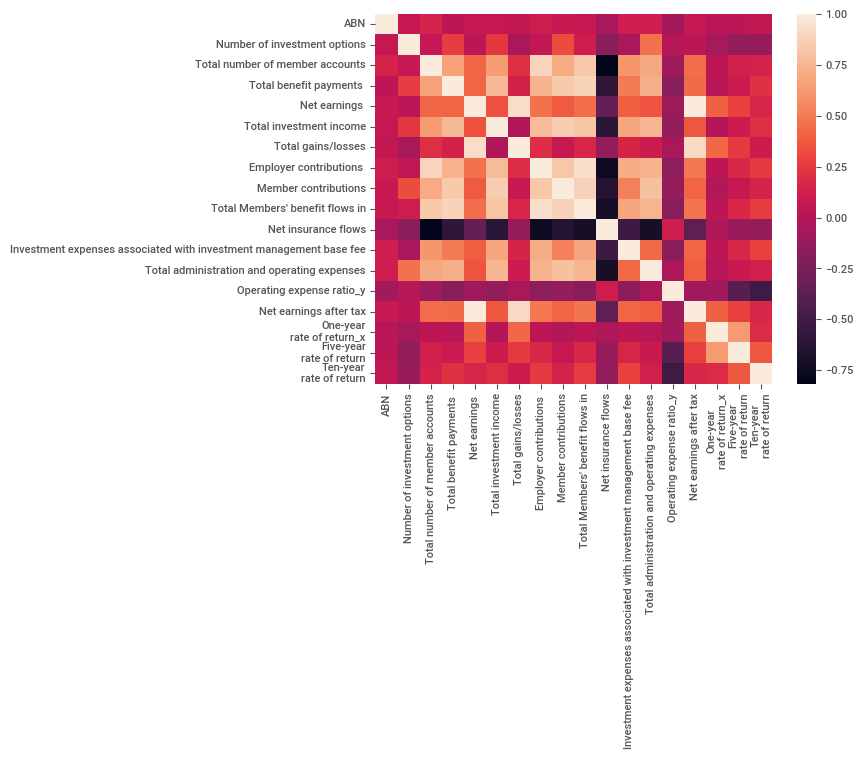

In [201]:
sns.heatmap(df.corr())

In [202]:
df.corr()['Ten-year\nrate of return'].sort_values(ascending=False)

/var/folders/p0/hyllg8rj5_5d3h8g4g3dfnjm0000gn/T/ipykernel_36686/2692432180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Ten-year\nrate of return'].sort_values(ascending=False)


Ten-year\nrate of return                                              1.000000
Five-year\nrate of return                                             0.362858
Investment expenses associated with investment management base fee    0.271496
Total Members' benefit flows in                                       0.258691
Employer contributions                                                0.251927
Total benefit payments                                                0.218306
Total investment income                                               0.205842
One-year\nrate of return_x                                            0.186347
Net earnings after tax                                                0.169919
Net earnings                                                          0.163185
Member contributions                                                  0.149029
Total number of member accounts                                       0.148462
Total administration and operating expenses         

In [113]:


df['Period'] = pd.to_datetime(df['Period']).astype(int)



/var/folders/p0/hyllg8rj5_5d3h8g4g3dfnjm0000gn/T/ipykernel_36686/4282336384.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Period'] = pd.to_datetime(df['Period']).astype(int)


In [203]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('sweetviz_report_mod.html')

                                             |      | [  0%]   00:00 -> (? left)

Report sweetviz_report_mod.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Fitting my first model to predict 10 Y return, and find the best features for it:

In [114]:
#Choosing features which are most correlated to 10 y return, but avoinding the ones
#that are highly correlated from each other to avoid multicoliniarity.
relevant_features = [
    'Period', 
    'Number of investment options', 
    'Total number of member accounts', 
    'Employer contributions ', 
    'Member contributions', 
    'Net insurance flows',
    'Total administration and operating expenses', 
    'Operating expense ratio_y',
    'Net earnings after tax' 
]


X= df[relevant_features]
y= df['Ten-year\nrate of return']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Fit the model to your training data
model.fit(X_train, y_train) 

LinearRegression()

In [120]:
# Predict on the test data
y_pred = model.predict(X_test)


# Evaluate the model
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 0.01141313055029084
MSE: 0.00021095888789650946
RMSE: 0.014524423840432


In [121]:
#IMPROVE MODEL WITH PERIOD AS YEAR AS FEATURE
#DUMMIES OF FUND TYPE 
# Convert the 'Period' column to datetime format
df['Period'] = pd.to_datetime(df['Period'], format='%Y-%m-%d')

# Create a new column with just the year
df['Year'] = df['Period'].dt.year
df.head()

,Period,Fund name,ABN,RSE licensee profit status,RSE licensee board structure,RSE Membership base,RSE licensee ownership type,Number of investment options,Total number of member accounts,Total benefit payments,...,Net earnings after tax,One-year\nrate of return_x,Five-year\nrate of return,Ten-year\nrate of return,Year,Fund_type_Corporate,Fund_type_Industry,Fund_type_Public Sector,Fund_type_Retail,Fund_type_Retail - ERF
0,2022-06-30,Alcoa of Australia Retirement Plan,80928800255,Not for profit status,Equal representation required by legislation,Corporate base,Employer sponsor (non-public sector) ownership,9.0,5224.0,87751.0,...,-44476.0,-0.020,0.04980,0.071711,2022,1,0,0,0,0
1,2022-06-30,AMG Super,30099320583,For profit status,Non equal representation,General base,Financial services corporation ownership,800.0,14955.0,49356.0,...,-115266.0,-0.072,0.04035,0.052548,2022,0,0,0,1,0
2,2022-06-30,AMP Super Fund,78421957449,For profit status,Non equal representation,General base,Financial services corporation ownership,112.0,743911.0,1761665.0,...,-3256996.0,-0.054,0.06047,0.063450,2022,0,0,0,1,0
3,2022-06-30,Aracon Superannuation Fund,40586548205,For profit status,Non equal representation,General base,Financial services corporation ownership,22.0,2865.0,50539.0,...,-40053.0,-0.068,0.03226,0.051596,2022,0,0,0,1,0
4,2022-06-30,ASGARD Independence Plan Division Two,90194410365,For profit status,Non equal representation,General base,Financial services corporation ownership,2068.0,94715.0,1152258.0,...,-1136042.0,-0.056,0.04444,0.059989,2022,0,0,0,1,0


In [117]:
dummy_df = pd.get_dummies(df['Fund type'], prefix='Fund_type')

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_df], axis=1)

df.drop('Fund type', axis=1, inplace=True)


In [123]:
relevant_features = ['Year',
    'Number of investment options', 
    'Total number of member accounts', 
    'Employer contributions ', 
    'Member contributions', 
    'Net insurance flows',
    'Total administration and operating expenses', 
    'Operating expense ratio_y',
    'Net earnings after tax','Fund_type_Corporate',
       'Fund_type_Industry', 'Fund_type_Public Sector', 'Fund_type_Retail',
       'Fund_type_Retail - ERF'
]

X= df[relevant_features]
y= df['Ten-year\nrate of return']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Fit the model to your training data
model.fit(X_train, y_train)  # X_train should be your feature matrix, y_train the target variable (one-year return)
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 0.010107665414408041
MSE: 0.00016237587188505342
RMSE: 0.01274267914863485


In [126]:
dummy_year = pd.get_dummies(df['Year'], prefix='Year')

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_year], axis=1)

df.drop('Year', axis=1, inplace=True)

In [128]:
dummy_structure = pd.get_dummies(df['RSE licensee board structure'], prefix='Board_Structure')

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_structure], axis=1)

df.drop('RSE licensee board structure', axis=1, inplace=True)

In [129]:
df.columns

Index(['Period', 'Fund name', 'ABN', 'RSE licensee profit status',
       'RSE Membership base', 'RSE licensee ownership type',
       'Number of investment options', 'Total number of member accounts',
       'Total benefit payments ', 'Net earnings ', 'Total investment income',
       'Total gains/losses', 'Employer contributions ', 'Member contributions',
       'Total Members' benefit flows in', 'Net insurance flows',
       'Investment expenses associated with investment management base fee',
       'Total administration and operating expenses',
       'Operating expense ratio_y', 'Net earnings after tax',
       'One-year\nrate of return_x', 'Five-year\nrate of return',
       'Ten-year\nrate of return', 'Fund_type_Corporate', 'Fund_type_Industry',
       'Fund_type_Public Sector', 'Fund_type_Retail', 'Fund_type_Retail - ERF',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Year_2020', 'Year_2021', 'Year_2022',
       'Board_Structure_Equal represen

In [171]:
from sklearn.model_selection import train_test_split

# Define a function that accepts a list of features in a DataFrame and returns the RMSE for a test dataset.

def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df['Ten-year\nrate of return']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# Compare different sets of features.
print(train_test_rmse(df, ['Number of investment options', 
    'Total number of member accounts', 
    'Employer contributions ', 
    'Member contributions', 
    'Net insurance flows',
    'Total administration and operating expenses', 'Net earnings after tax',
    'Operating expense ratio_y','Fund_type_Corporate', 'Fund_type_Industry',
       'Fund_type_Public Sector', 'Fund_type_Retail', 'Fund_type_Retail - ERF',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Year_2020', 'Year_2021', 'Year_2022',
       'Board_Structure_Equal representation required by governing rules',
       'Board_Structure_Equal representation required by legislation',
       'Board_Structure_Non equal representation']))
print(train_test_rmse(df, ['Total number of member accounts', 
    'Employer contributions ', 
    'Member contributions', 
    'Net insurance flows',
    'Total administration and operating expenses', 
    'Operating expense ratio_y','Fund_type_Corporate', 'Fund_type_Industry',
       'Fund_type_Public Sector', 'Fund_type_Retail', 'Fund_type_Retail - ERF',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Year_2020', 'Year_2021', 'Year_2022',
       'Board_Structure_Equal representation required by governing rules',
       'Board_Structure_Equal representation required by legislation',
       'Board_Structure_Non equal representation']))
print(train_test_rmse(df, ['Total number of member accounts', 
    'Employer contributions ', 
    'Member contributions', 
    'Net insurance flows',
    'Total administration and operating expenses','Fund_type_Corporate', 'Fund_type_Industry',
       'Fund_type_Public Sector', 'Fund_type_Retail', 'Fund_type_Retail - ERF',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Year_2020', 'Year_2021', 'Year_2022']))


0.010794806775193181
0.0109428810039838
0.012124386668668467


In [153]:
#null hyphotesis
feature_cols = ['Number of investment options', 
    'Total number of member accounts', 
    'Employer contributions ', 
    'Member contributions', 
    'Net insurance flows',
    'Total administration and operating expenses', 
    'Operating expense ratio_y','Fund_type_Corporate', 'Fund_type_Industry',
       'Fund_type_Public Sector', 'Fund_type_Retail', 'Fund_type_Retail - ERF',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Year_2020', 'Year_2021', 'Year_2022',
       'Board_Structure_Equal representation required by governing rules',
       'Board_Structure_Equal representation required by legislation',
       'Board_Structure_Non equal representation']
X = df[feature_cols]
y = df['Ten-year\nrate of return']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
#y_test.mean() gives you the average number of bike rentals in your testing dataset

y_test.mean()
# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)
#This creates a new NumPy array with the same shape as y_test and
#sets all its elements to zero.


y_null.fill(y_test.mean())
# Compute null RMSE.
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming y_test is your true target values and y_null is your null model's predictions
# Calculate RMSE for the null model
rmse_null = np.sqrt(mean_squared_error(y_test, y_null))
rmse_null

0.0194899691913088

Okay, doing better then null hyphotesis model.


In [172]:
feature_cols = ['Number of investment options', 
    'Total number of member accounts', 
    'Employer contributions ', 
    'Member contributions', 
    'Net insurance flows',
    'Total administration and operating expenses', 'Net earnings after tax',
    'Operating expense ratio_y','Fund_type_Corporate', 'Fund_type_Industry',
       'Fund_type_Public Sector', 'Fund_type_Retail', 'Fund_type_Retail - ERF',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Year_2020', 'Year_2021', 'Year_2022',
       'Board_Structure_Equal representation required by governing rules',
       'Board_Structure_Equal representation required by legislation',
       'Board_Structure_Non equal representation']
X = df[feature_cols]
y = df['Ten-year\nrate of return']

linreg = LinearRegression()
linreg.fit(X, y)

intercept = linreg.intercept_
coefficients = linreg.coef_

# Get the intercept and coefficients
print(f"Intercept: {intercept}")
print("Coefficients:")
for feature, coef in zip(feature_cols, coefficients):
    print(f"{feature}: {coef}")



Intercept: 0.06052579949583032
Coefficients:
Number of investment options: -3.627797687375035e-06
Total number of member accounts: -1.4252886837968978e-09
Employer contributions : 1.0149950502070081e-09
Member contributions: -2.7699775337675016e-09
Net insurance flows: -6.03967534603e-09
Total administration and operating expenses: 2.7501742277556286e-08
Net earnings after tax: 2.4983444930791264e-10
Operating expense ratio_y: -0.8914166810118549
Fund_type_Corporate: 0.006241115802464032
Fund_type_Industry: 0.00483914008761157
Fund_type_Public Sector: 0.001184436459837591
Fund_type_Retail: -0.0017263614789353797
Fund_type_Retail - ERF: -0.010538330870978857
Year_2015: -0.0032922902355779346
Year_2016: -0.01390135643603657
Year_2017: -0.019436483339542763
Year_2018: -0.004567913114847335
Year_2019: 0.013884894435222736
Year_2020: 0.0051575996171738135
Year_2021: 0.0129735158684244
Year_2022: 0.009182033205157389
Board_Structure_Equal representation required by governing rules: 0.0010265

Need to scalle features, the model is giving unnecessary importance to features with a larger magnitude.

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Initialize the StandardScaler
scaler = StandardScaler()


# You can now use X_train_scaled and X_test_scaled in your model training

feature_cols = ['Number of investment options', 
    'Total number of member accounts', 
    'Employer contributions ', 
    'Member contributions', 
    'Net insurance flows',
    'Total administration and operating expenses', 
    'Operating expense ratio_y','Fund_type_Corporate', 'Fund_type_Industry',
       'Fund_type_Public Sector', 'Fund_type_Retail', 'Fund_type_Retail - ERF',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Year_2020', 'Year_2021', 'Year_2022',
       'Board_Structure_Equal representation required by governing rules',
       'Board_Structure_Equal representation required by legislation',
       'Board_Structure_Non equal representation']

X = df[feature_cols]
y = df['Ten-year\nrate of return']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = linreg.predict(X_test_scaled)


# Get the intercept and coefficients
intercept = linreg.intercept_
coefficients = linreg.coef_

print(f"Intercept: {intercept}")
print("Coefficients:")
for feature, coef in zip(feature_cols, coefficients):
    print(f"{feature}: {coef}")


Intercept: 0.05370141785047846
Coefficients:
Number of investment options: -0.0021829859104617708
Total number of member accounts: 0.000346320213784839
Employer contributions : 0.0005423820008654249
Member contributions: -0.0009343595949285372
Net insurance flows: -0.0002473980088564933
Total administration and operating expenses: 0.002105113748569979
Operating expense ratio_y: -0.006294123626387379
Fund_type_Corporate: 0.0015032604269799754
Fund_type_Industry: 0.0019028371832790158
Fund_type_Public Sector: 3.372944382467697e-05
Fund_type_Retail: -0.0014386681240465677
Fund_type_Retail - ERF: -0.0028544599615403675
Year_2015: -0.0007174321261273194
Year_2016: -0.004605768532469635
Year_2017: -0.00618816821928641
Year_2018: -0.0009232206356683519
Year_2019: 0.004918423877778007
Year_2020: 0.0020835241726164092
Year_2021: 0.004516437598954559
Year_2022: 0.0028227033293468243
Board_Structure_Equal representation required by governing rules: 0.0004338574051397863
Board_Structure_Equal repr

The coefficients look much more reasonable after applied StandardScaler to features. Scaling is especially useful when features have different units or different ranges, as it can help the optimization algorithm converge more quickly and find a better solution.

In [165]:
rmse = calculate_rmse(y_test, y_pred)
print("RMSE for model with scaled features:", rmse)

RMSE for model with scaled features: 0.010550875276583209


In [174]:

r_squared = linreg.score(X_test_scaled, y_test)
print("R-squared value:", r_squared)

R-squared value: 0.6676304229780381


In [176]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Initialize the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=123)

# Fit the model
gbm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gbm = gbm.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gbm)
rmse = sqrt(mse)  # Root Mean Square Error

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error (RMSE): {rmse}")


Mean Squared Error (MSE): 9.090897626211125e-05
Root Mean Square Error (RMSE): 0.009534619880315693


Root Mean Square Error (RMSE): 0.009534619880315693 is better for GradientBoostingRegressor. 


Predict the ranking of funds, using 10 ROR as the relevant feature. 


In [179]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Separate the "Fund name" column before splitting
fund_names = df['Fund name']

X = df[feature_cols]
y = df['Ten-year\nrate of return']

# Split the data, including the fund_names to keep indices consistent
X_train, X_test, y_train, y_test, fund_names_train, fund_names_test = train_test_split(X, y, fund_names, test_size=0.2, random_state=123)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = gbr.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Sort the predictions (in descending order for highest returns first)
sorted_indices = np.argsort(y_pred)[::-1]

# Sort fund names according to the sorted prediction indices
sorted_fund_names = fund_names_test.iloc[sorted_indices].reset_index(drop=True)

# Create a DataFrame to hold sorted fund names and their predicted 10-year returns
sorted_df = pd.DataFrame({
    'Fund Name': sorted_fund_names,
    'Predicted 10-Year Return': y_pred[sorted_indices]
})

print("Sorted Fund Names and Predicted 10-Year Returns:")
print(sorted_df)



Root Mean Square Error (RMSE): 0.009571809794484059
Sorted Fund Names and Predicted 10-Year Returns:
                                          Fund Name  Predicted 10-Year Return
0                       Australian Retirement Trust                  0.083718
1                      Sunsuper Superannuation Fund                  0.082807
2                     Victorian Superannuation Fund                  0.081809
3                                      Spirit Super                  0.080650
4        Goldman Sachs & JBWere Superannuation Fund                  0.080437
..                                              ...                       ...
204                           Super Retirement Fund                  0.024336
205                Premiumchoice Retirement Service                  0.022826
206  The State Bank Supersafe Approved Deposit Fund                  0.022602
207                      Aon Eligible Rollover Fund                  0.014009
208               StatePlus Fixed Term Pe

Filtering the results only to show industry type funds:

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Assume df, X, y are already defined
# df contains your full dataset
# X contains your features
# y contains your target variable (10y return)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Root Mean Square Error (RMSE): {rmse}')

# Sort the predictions and corresponding fund names
sorted_indices = np.argsort(y_test_pred)
sorted_predictions = y_test_pred[sorted_indices]

# Extract fund_names and Fund_type_Industry directly using the index from the split DataFrames
fund_names_train = df.loc[X_train.index, 'Fund name'].reset_index(drop=True)
fund_names_test = df.loc[X_test.index, 'Fund name'].reset_index(drop=True)
fund_type_industry_test = df.loc[X_test.index, 'Fund_type_Industry'].reset_index(drop=True)

# Sort the fund names according to the sorted prediction indices
sorted_fund_names = fund_names_test.iloc[sorted_indices].reset_index(drop=True)

# Create a DataFrame to combine all the sorted test data
sorted_df = pd.DataFrame({
    'Fund Name': sorted_fund_names,
    'Predicted 10y Return': sorted_predictions,
    'Fund_type_Industry': fund_type_industry_test.iloc[sorted_indices].reset_index(drop=True)
})

# Filter the DataFrame to show only rows where Fund_type_Industry == 1
filtered_df = sorted_df[sorted_df['Fund_type_Industry'] == 1]

print(filtered_df)


Root Mean Square Error (RMSE): 0.010550875276583209
                                             Fund Name  Predicted 10y Return  \
18                      Nationwide Superannuation Fund              0.031695   
56                             TWU Superannuation Fund              0.043613   
57                                      Maritime Super              0.044094   
59                                 Combined Super Fund              0.044528   
60                                          equipsuper              0.044951   
62   The Victorian Independent Schools Superannuati...              0.045409   
65                                  Intrust Super Fund              0.046328   
66                        HOSTPLUS Superannuation Fund              0.046941   
67       Australian Meat Industry Superannuation Trust              0.047950   
69                                          legalsuper              0.048768   
71   The Victorian Independent Schools Superannuati...              

In [187]:
filtered_df.sort_values('Predicted 10y Return', ascending=False)[['Fund Name', 'Predicted 10y Return']]



,Fund Name,Predicted 10y Return
208,Sunsuper Superannuation Fund,0.085829
204,HESTA,0.078916
201,Retail Employees Superannuation Trust,0.078510
200,The Victorian Independent Schools Superannuati...,0.078228
198,Statewide Superannuation Trust,0.077483
191,Spirit Super,0.076018
190,Club Plus Superannuation Scheme,0.076000
189,Christian Super,0.075658
188,Intrust Super Fund,0.075212
184,NGS Super,0.074011


Predicting ranking using gradient booster as it gave a slightly better RMSE:

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Assume df, X, y are already defined
# df contains your full dataset
# X contains your features
# y contains your target variable (10y return)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = GradientBoostingRegressor()  # You can set hyperparameters here
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Root Mean Square Error (RMSE): {rmse}')

# Sort the predictions and corresponding fund names
sorted_indices = np.argsort(y_test_pred)
sorted_predictions = y_test_pred[sorted_indices]

# Extract fund_names and Fund_type_Industry directly using the index from the split DataFrames
fund_names_train = df.loc[X_train.index, 'Fund name'].reset_index(drop=True)
fund_names_test = df.loc[X_test.index, 'Fund name'].reset_index(drop=True)
fund_type_industry_test = df.loc[X_test.index, 'Fund_type_Industry'].reset_index(drop=True)

# Sort the fund names according to the sorted prediction indices
sorted_fund_names = fund_names_test.iloc[sorted_indices].reset_index(drop=True)

# Create a DataFrame to combine all the sorted test data
sorted_df = pd.DataFrame({
    'Fund Name': sorted_fund_names,
    'Predicted 10y Return': sorted_predictions,
    'Fund_type_Industry': fund_type_industry_test.iloc[sorted_indices].reset_index(drop=True)
})

# Filter the DataFrame to show only rows where Fund_type_Industry == 1
filtered_df = sorted_df[sorted_df['Fund_type_Industry'] == 1]

print(filtered_df)


Root Mean Square Error (RMSE): 0.009550780472611226
                                             Fund Name  Predicted 10y Return  \
13                      Nationwide Superannuation Fund              0.029827   
45                             TWU Superannuation Fund              0.041491   
48                                      Maritime Super              0.042249   
57   The Victorian Independent Schools Superannuati...              0.043747   
58                                 Combined Super Fund              0.043747   
60                                  Intrust Super Fund              0.045111   
61                                          equipsuper              0.045145   
66                                          legalsuper              0.046662   
67                      Quadrant Superannuation Scheme              0.047413   
70       Australian Meat Industry Superannuation Trust              0.048048   
71   The Victorian Independent Schools Superannuati...              

In [189]:
filtered_df.sort_values('Predicted 10y Return', ascending=False)[['Fund Name', 'Predicted 10y Return']]




,Fund Name,Predicted 10y Return
207,Sunsuper Superannuation Fund,0.082807
205,Spirit Super,0.080650
203,The Victorian Independent Schools Superannuati...,0.080056
202,HESTA,0.080053
195,Club Plus Superannuation Scheme,0.077999
192,Statewide Superannuation Trust,0.076933
186,Intrust Super Fund,0.075277
185,Retail Employees Superannuation Trust,0.075258
182,Mine Superannuation Fund,0.074261
183,Australian Catholic Superannuation and Retirem...,0.074261
